# Lab Assignment 7:

# Write a python program for Multiple Linear Regression and Check weather multicollinearity exits between the data or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
# loading our csv file using numpy and printing
data = np.loadtxt('Concrete_Data.csv',delimiter=',',skiprows=1)
print(data)

[[540.     0.     0.   ... 676.    28.    79.99]
 [540.     0.     0.   ... 676.    28.    61.89]
 [332.5  142.5    0.   ... 594.   270.    40.27]
 ...
 [148.5  139.4  108.6  ... 780.    28.    23.7 ]
 [159.1  186.7    0.   ... 788.9   28.    32.77]
 [260.9  100.5   78.3  ... 761.5   28.    32.4 ]]


In [49]:
# To access the columns of data transposing it 
newdata = data.T
print(newdata)

[[540.   540.   332.5  ... 148.5  159.1  260.9 ]
 [  0.     0.   142.5  ... 139.4  186.7  100.5 ]
 [  0.     0.     0.   ... 108.6    0.    78.3 ]
 ...
 [676.   676.   594.   ... 780.   788.9  761.5 ]
 [ 28.    28.   270.   ...  28.    28.    28.  ]
 [ 79.99  61.89  40.27 ...  23.7   32.77  32.4 ]]


In [59]:
# our Y attribute is cement 
Y = newdata[0]
print('--------------Y-vector------------')
print(Y)

--------------Y-vector------------
[540.  540.  332.5 ... 148.5 159.1 260.9]


In [60]:
# our X1 attribute water 
X_1 = newdata[3]
print('--------------x1-vector---------------')
print(X_1)

--------------x1-vector---------------
[162.  162.  228.  ... 192.7 175.6 200.6]


In [61]:
# our X2 attribute CMS
X_2 = newdata[8]
print('--------------x2-vector---------------')
print(X_2)

--------------x2-vector---------------
[79.99 61.89 40.27 ... 23.7  32.77 32.4 ]


In [62]:
#  y = b0 + x1 * b1 + x2 * b2 
# changing our x1 and x2 attributes in 1-d array for manipulation
n = len(X_1)
x_1 = np.array(X_1).reshape(n, 1)
print('-----------------X1-matrix-----------')
print(x_1)
print()
x_2 = np.array(X_2).reshape(n, 1)
print('-----------------X2-matrix-----------')
print(x_2)
print()
Y = np.array(Y).reshape(n, 1)
print('-----------------Y-matrix-----------')
print(Y)
print()
print('-----------------X0-matrix-----------')
x_0 = np.ones([n, 1])
print(x_0)

-----------------X1-matrix-----------
[[162. ]
 [162. ]
 [228. ]
 ...
 [192.7]
 [175.6]
 [200.6]]

-----------------X2-matrix-----------
[[79.99]
 [61.89]
 [40.27]
 ...
 [23.7 ]
 [32.77]
 [32.4 ]]

-----------------Y-matrix-----------
[[540. ]
 [540. ]
 [332.5]
 ...
 [148.5]
 [159.1]
 [260.9]]

-----------------X0-matrix-----------
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [64]:
# making a single X matrix from two 1-d array to use it in beta = (((X.T)X)^-1)(X.T)Y
X = np.hstack((x_0, x_1, x_2)) # hstackis used concatanate multidimensional arrays 
print('--------------X-matrix--------------')
print()
print(X)

--------------X-matrix--------------

[[  1.   162.    79.99]
 [  1.   162.    61.89]
 [  1.   228.    40.27]
 ...
 [  1.   192.7   23.7 ]
 [  1.   175.6   32.77]
 [  1.   200.6   32.4 ]]


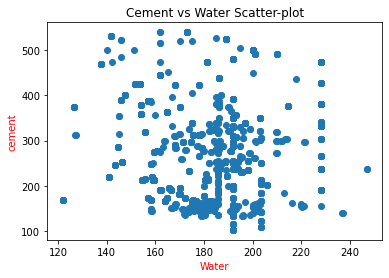

In [66]:
# trying to visualise X1 and Y using scattter plot 
plt.xlabel('Water',color ='red')
plt.ylabel('cement',color ='red')
plt.title('Cement vs Water Scatter-plot')
plt.scatter(X_1, Y)
plt.show()

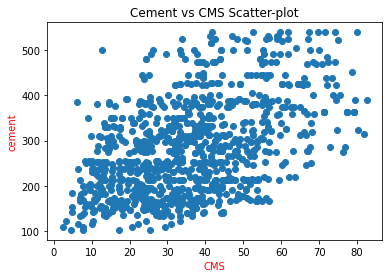

In [67]:
# trying to visualise X2 and Y using scattter plot 
plt.xlabel('CMS',color ='red')
plt.ylabel('cement',color ='red')
plt.title('Cement vs CMS Scatter-plot')
plt.scatter(X_2, Y)
plt.show()

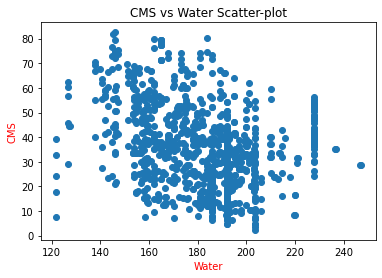

In [69]:
# trying to visualise X1 and X2 using scattter plot  and predicting the correlation between them 
plt.xlabel('Water',color ='red')
plt.ylabel('CMS',color ='red')
plt.title('CMS vs Water Scatter-plot')
plt.scatter(X_1, X_2)
plt.show()

In [72]:
# now we have X matrix , Y matrix we need to find Beta matrix 
# converting X to X transpose
X_transpose = X.T
print('-------------X Transpose matrix------------')
print()
print(X_transpose)

-------------X Transpose matrix------------

[[  1.     1.     1.   ...   1.     1.     1.  ]
 [162.   162.   228.   ... 192.7  175.6  200.6 ]
 [ 79.99  61.89  40.27 ...  23.7   32.77  32.4 ]]


In [74]:
# calculating X.T * X
X_transpose_X = X_transpose.dot(X)
print('-------------X Transpose*X matrix------------')
print()
print(X_transpose_X)

-------------X Transpose*X matrix------------

[[1.03000000e+03 1.87014300e+05 3.68925000e+04]
 [1.87014300e+05 3.44249048e+07 6.59215131e+06]
 [3.68925000e+04 6.59215131e+06 1.60858932e+06]]


In [77]:
# inverse of ((X.T)X)
inverse_XTX = np.linalg.inv(X_transpose_X)
print('-------------Inverse of X Transpose*X matrix------------')
print()
print(inverse_XTX)

-------------Inverse of X Transpose*X matrix------------

[[ 9.37404156e-02 -4.53231247e-04 -2.92522970e-04]
 [-4.53231247e-04  2.32631461e-06  8.61261398e-07]
 [-2.92522970e-04  8.61261398e-07  3.80105608e-06]]


In [79]:
# calculating (X.T)Y
X_transpose_Y = (X_transpose).dot(Y)
print('-------------X-transpose*Y matrix------------')
print()
print(X_transpose_Y)

-------------X-transpose*Y matrix------------

[[  289602.9       ]
 [52395057.95000003]
 [11267333.595     ]]


In [19]:
# calculating for beta
betas = inverse_XTX.dot(X_transpose_Y)
print("our beta matrix is : \n", betas)

our beta matrix is : 
 [[104.46486615]
 [  0.33442476]
 [  3.23810735]]


In [81]:
beta_0 = betas[0]
beta_1 = betas[1]
beta_2 = betas[2]
print('-------------Value of intercept, beta1, beta2 ------------')
print()
print("beta0 = ", beta_0, "\nbeta1 = ", beta_1, "\nbeta2 = ", beta_2)

-------------Value of intercept, beta1, beta2 ------------

beta0 =  [104.46486615] 
beta1 =  [0.33442476] 
beta2 =  [3.23810735]


In [86]:
# fitting value 
print('------------------Our fitted line for model----------------')
print()
print('Y =', beta_0, '+', beta_1, 'X1','+', beta_2, 'X2')

------------------Our fitted line for model----------------

Y = [104.46486615] + [0.33442476] X1 + [3.23810735] X2


In [87]:
# findind Y-pred
y_pred = np.array([])
y_pred1 = 0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        y_pred1 =y_pred1 + (betas[j] * X[i][j])
    y_pred = np.append(y_pred,y_pred1, axis = 0)
    y_pred1 = 0

y_pred = y_pred.reshape(n,1)
print('y-hat :\n\n', y_pred)

y-hat :

 [[417.65788447]
 [359.04814135]
 [311.11229447]
 ...
 [245.6516616 ]
 [269.30263191]
 [276.46515118]]


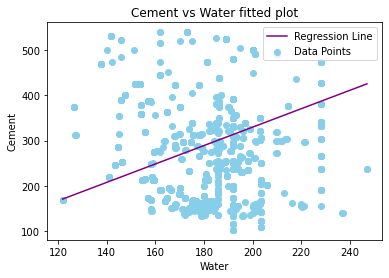

In [88]:
# plt.scatter(X, Y,color='skyblue', label='Data Points') # actual
# 1st fitted plot for Y and x_1
plt.scatter(x_1, Y, color='skyblue', label='Data Points')
plt.plot([min(x_1), max(x_1)], [min(y_pred), max(y_pred)], color='purple', label='Regression Line')# predicted
plt.xlabel('Water', color = 'black')
plt.ylabel('Cement', color = 'black')
plt.title('Cement vs Water fitted plot')
plt.legend()
plt.show()

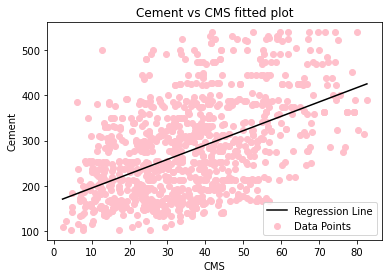

In [89]:
# 2nd fitted line for Y and x_2 
plt.scatter(x_2, Y, color='pink', label='Data Points')
plt.plot([min(x_2), max(x_2)], [min(y_pred), max(y_pred)], color='black', label='Regression Line')
plt.xlabel('CMS', color = 'black')
plt.ylabel('Cement', color = 'black')
plt.title('Cement vs CMS fitted plot')
plt.legend()
plt.show()

In [90]:
# calculting R-square value
numerator = 0.0
denomenator = 0.0

y_mean = np.mean(Y)

for i in range(len(Y)):
    numerator = numerator + ((y_pred[i] - y_mean)**2)
    denomenator = denomenator + ((Y[i] - y_mean)**2)

R_square = numerator/denomenator
print('R-square value is : ', R_square)  

R-square value is :  [0.25211449]


In [91]:
#anova attributes
ss_regression = 0.0
ss_residual = 0.0

for i in range(X.shape[0]):
#     Y_pred = beta1*X[i] + beta0
    ss_regression += (y_pred[i]-y_mean)**2
    ss_residual += (Y[i]-y_pred[i])**2

print("SS_regression :", ss_regression, "\nSS_residual:", ss_residual,"\nSS_total :", ss_regression+ss_residual)

SS_regression : [2833339.79186592] 
SS_residual: [8404966.25443505] 
SS_total : [11238306.04630097]


In [92]:
n = X.shape[0]

ms_regression = (ss_regression/2)
ms_residual = (ss_residual/(n-3))
print("MS Regression :", ms_regression, "\nMS Residual :", ms_residual)

MS Regression : [1416669.89593296] 
MS Residual : [8183.99830033]


In [93]:
F_stats = (ms_regression/ms_residual)
print("F-stats for data : ", F_stats)
std_Error = (ms_residual**0.5) 
print("Standared Error :", std_Error)

F-stats for data :  [173.10241815]
Standared Error : [90.46545363]


In [94]:
# anova table
F_significant = 1.64E-65 #from table
print("ANOVA\n","\t\t","degree of freedom\t\t", "SS\t\t", "MS\t\t", "\tF-stats\t", "\t   significance-F")
print("\nRegression\t", "k-1=", 2 , "\t\t", ss_regression, "\t", ms_regression, "\t", F_stats, "\t", F_significant)
print("\nResidual\t", "n-k =", 1027, "\t\t", ss_residual, "\t", ms_residual )
print("\nTotal\t\t", "n-1 =", 1029, "\t\t", ss_regression+ss_residual )

ANOVA
 		 degree of freedom		 SS		 MS		 	F-stats	 	   significance-F

Regression	 k-1= 2 		 [2833339.79186592] 	 [1416669.89593296] 	 [173.10241815] 	 1.64e-65

Residual	 n-k = 1027 		 [8404966.25443505] 	 [8183.99830033]

Total		 n-1 = 1029 		 [11238306.04630097]
